In [59]:
from evaluation import *
import matplotlib.pyplot as plt
import plotly.express as px
import scipy 
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import seaborn as sb
%matplotlib inline

In [60]:
scores_path = '../../stream_graph_data/clustered_networks/dotSimilarity_done/'
nx_path = '../../stream_graph_data/nx_graphs/done/'
out_path = '../../stream_graph_data/scores/scores_2/'
plots_path = '../../stream_graph_data/plots/'

In [61]:
# get all files in datapath 
all_files = [f for f in listdir(scores_path) if isfile(join(scores_path, f))]
li = []
for file in all_files:

    with open(scores_path + file, 'rb') as f:
        d = pickle.load(f)
    
    network_name = file.split('_scores')[0]
    g = nx.read_gpickle(nx_path + network_name + '.pkl')
    density = nx.density(g)
    
    # turn scores (dict) into dataframe
    df = pd.DataFrame.from_dict(d, orient='index')
    df['network_name'] = network_name
    df['density'] = density
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [66]:
frame.sort_values(by='network_name', ascending=False)

,initial_threshold,merging_threshold,clusters_found,clusters_merged,remaining_clusters,newman_mod,erdos_renyi_mod,link_mod,modularity_density,z_modularity,...,internal_edge_density,normalized_cut,max_odf,avg_odf,flake_odf,significance,surprise,triangle_participation_ratio,network_name,density
1337,0.345679,0.370370,4,0,4,0.260653,0.586510,0.133049,2.197500,0.626032,...,0.219048,0.200450,2.250000,0.645833,0.062500,NaN,78.727741,0.9375,zebra,0.316239
1356,0.395061,0.395061,4,0,4,0.260653,0.586510,0.133049,2.197500,0.626032,...,0.219048,0.200450,2.250000,0.645833,0.062500,NaN,78.727741,0.9375,zebra,0.316239
1354,0.395061,0.345679,4,0,4,0.260653,0.586510,0.133049,2.197500,0.626032,...,0.219048,0.200450,2.250000,0.645833,0.062500,NaN,78.727741,0.9375,zebra,0.316239
1353,0.395061,0.320987,4,0,4,0.260653,0.586510,0.133049,2.197500,0.626032,...,0.219048,0.200450,2.250000,0.645833,0.062500,NaN,78.727741,0.9375,zebra,0.316239
1352,0.395061,0.296296,4,0,4,0.260653,0.586510,0.133049,2.197500,0.626032,...,0.219048,0.200450,2.250000,0.645833,0.062500,NaN,78.727741,0.9375,zebra,0.316239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,1.061728,0.851852,212,37,175,0.003771,0.014739,0.001186,-339.250000,1.402716,...,0.005714,0.994122,2.508571,2.214286,0.988571,NaN,4.024073,0.0000,PDZBase,0.010909
1191,1.061728,0.876543,212,37,175,0.003771,0.014739,0.001186,-339.250000,1.402716,...,0.005714,0.994122,2.508571,2.214286,0.988571,NaN,4.024073,0.0000,PDZBase,0.010909
1192,1.061728,0.901235,212,37,175,0.003771,0.014739,0.001186,-339.250000,1.402716,...,0.005714,0.994122,2.508571,2.214286,0.988571,NaN,4.024073,0.0000,PDZBase,0.010909
1193,1.061728,0.925926,212,37,175,0.003771,0.014739,0.001186,-339.250000,1.402716,...,0.005714,0.994122,2.508571,2.214286,0.988571,NaN,4.024073,0.0000,PDZBase,0.010909


In [ ]:
# get all files in datapath 
all_files = [f for f in listdir(scores_path) if isfile(join(scores_path, f))]

for file in all_files:

    with open(scores_path + file, 'rb') as f:
        d = pickle.load(f)
    
    network_name = file.split('_scores')[0]
    g = nx.read_gpickle(nx_path + network_name + '.pkl')
    density = nx.density(g)
    
    # turn scores (dict) into dataframe
    df = pd.DataFrame.from_dict(d, orient='index')

    # sort by score to get best score
    df = df.sort_values(by='conductance', ascending=True)
    initial_t = df.initial_threshold.iloc[0]
    merging_t = df.merging_threshold.iloc[0]
    
    # type of fitness here
    highest_score = df.conductance.iloc[0]
    
    initial_clusters = df.clusters_found.iloc[0]
    clusters_merged = df.clusters_merged.iloc[0]
    final_clusters = df.remaining_clusters.iloc[0]
    
    print('network_name: ' + network_name)
    print('initial_threshold: ' + str(initial_t))
    print('merging_threshold: ' + str(merging_t))
    print('highest_score:' + str(highest_score))
    print('initial_clusters:' + str(initial_clusters))
    print('clusters_merged:' + str(clusters_merged))
    print('remaining_clusters:' + str(final_clusters))
    
    communities = louvain(g)
    
    louvain_score = evaluation.conductance(g,communities)
    
    print('louvain: ' +  str(louvain_score.score))
    print('')
    
    f = open(out_path + 'conductance.csv', 'a+')
    f.write('{},{},{},{},{},{},{},{},{}\n'.format(network_name, 
                                                  density, 
                                                  initial_t, 
                                                  merging_t, 
                                                  highest_score, 
                                                  initial_clusters, 
                                                  clusters_merged, 
                                                  final_clusters, 
                                                  louvain_score.score))
    f.close()
print('done')

In [2]:
scores_path = '../../stream_graph_data/clustered_networks/dotSimilarity_done/'
nx_path = '../../stream_graph_data/nx_graphs/done/'
out_path = '../../stream_graph_data/scores/scores_2/'
plots_path = '../../stream_graph_data/plots/'

In [122]:
def plotScores(df, fitness):
    networks = dfd.network.tolist()
    alg_scores = dfd.alg_score.tolist()
    louvain_scores = dfd.louvain_score.tolist()

    fig = go.Figure(data=[
        go.Bar(name='Algorithm', x=networks, y=alg_scores,  marker_color='mediumslateblue'),
        go.Bar(name='Louvain', x=networks, y=louvain_scores,  marker_color='grey')
    ])

    # Change the bar mode
    fig.update_layout(barmode='group', title_text='Algorithm vs Louvain | Fitness: ' + fitness)
    fig.show()

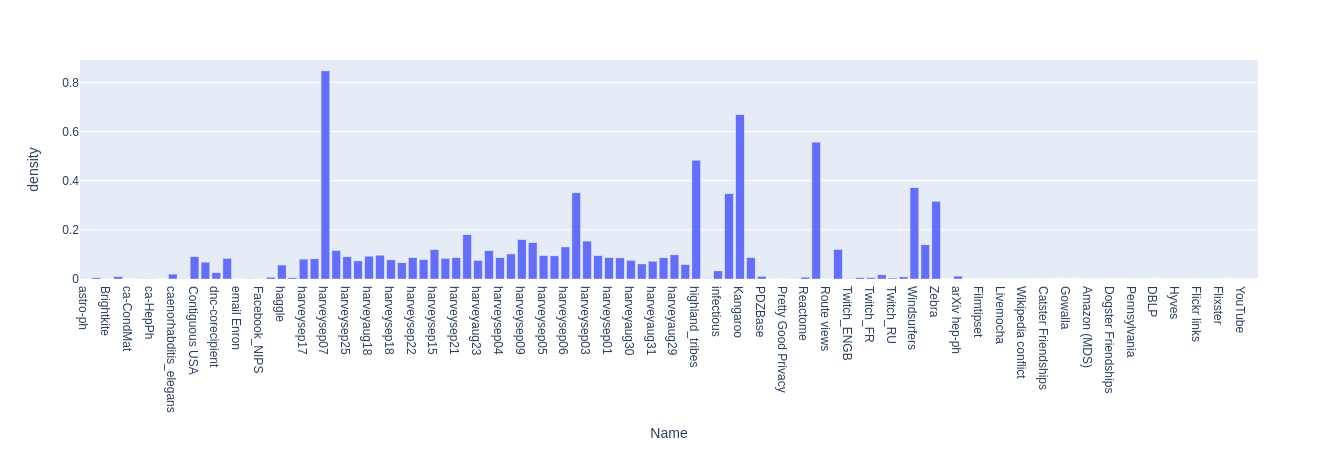

In [5]:
dfd = pd.read_csv('../../stream_graph_data/all_densities.csv')
fig = px.bar(dfd, x='Name', y='density')
fig.show()

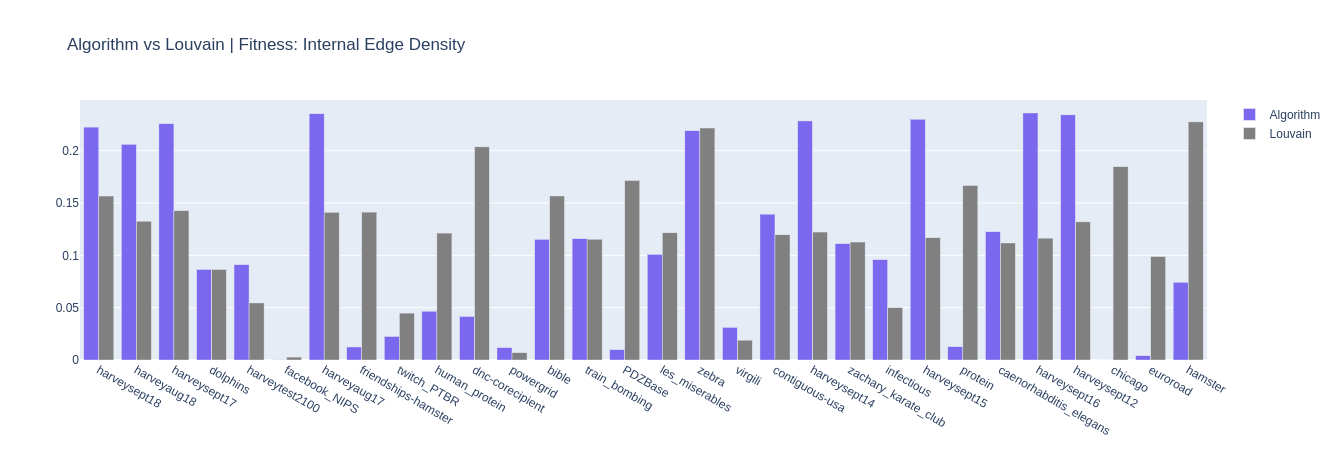

In [130]:
dfd = pd.read_csv('../../stream_graph_data/scores/scores_2/internal_edge_density.csv')
# dfd = dfd.sort_values(by=['density'], ascending=False)
plotScores(dfd,'Internal Edge Density')

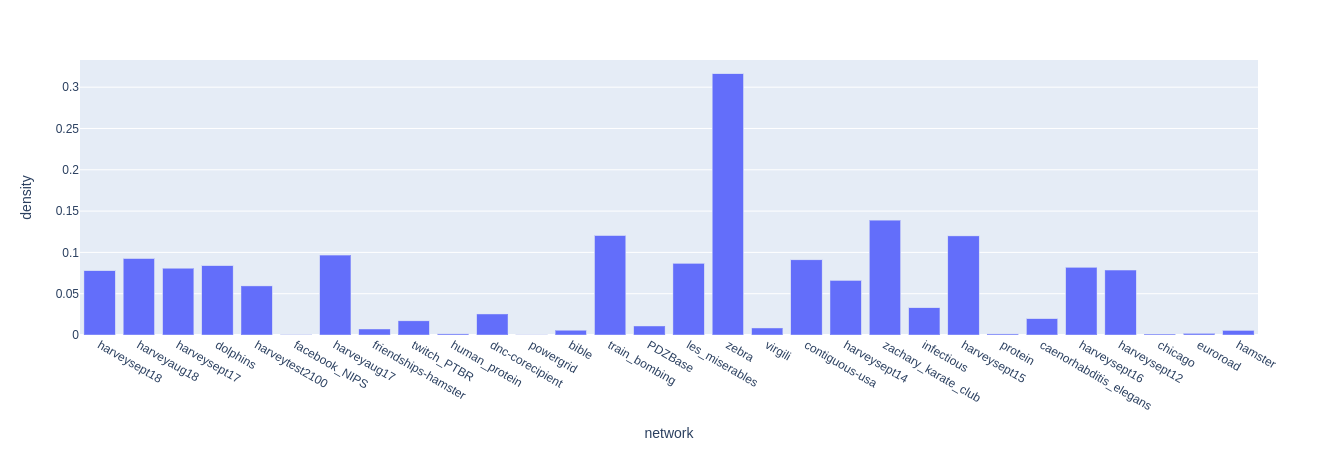

In [137]:
fig = px.bar(dfd, x='network', y='density')
fig.show()

In [16]:
frame.head()

,initial_threshold,merging_threshold,clusters_found,clusters_merged,remaining_clusters,newman_mod,erdos_renyi_mod,link_mod,modularity_density,z_modularity,...,fraction_over_median_degree,internal_edge_density,normalized_cut,max_odf,avg_odf,flake_odf,significance,surprise,triangle_participation_ratio,network_name
0,0.135802,0.024691,30,10,20,0.507184,0.577504,0.098814,-10.727615,1.971188,...,0.267487,0.158288,0.558488,125.550000,47.781476,0.568442,NaN,182156.594742,0.992857,harveysept18
1,0.135802,0.049383,30,9,21,0.507036,0.577618,0.098786,-12.600199,1.970653,...,0.252031,0.165140,0.567315,122.904762,47.425614,0.585197,NaN,182444.198995,0.993197,harveysept18
2,0.135802,0.074074,30,8,22,0.506778,0.578115,0.098723,-13.580120,1.969723,...,0.244612,0.167868,0.573204,120.590909,47.271994,0.602591,NaN,183428.836161,0.993506,harveysept18
3,0.135802,0.098765,30,7,23,0.506624,0.578179,0.098697,-18.075536,1.969161,...,0.241537,0.170627,0.587005,118.000000,46.521329,0.621131,NaN,183642.791278,0.993789,harveysept18
4,0.135802,0.123457,30,6,24,0.506925,0.580808,0.097984,-17.664271,1.990046,...,0.239519,0.173858,0.579708,118.375000,47.098710,0.604104,NaN,191080.249506,0.994048,harveysept18


In [17]:
fig = px.scatter_3d(frame, x='initial_threshold', y='merging_threshold', z='density',
                    color='newman_mod')

fig.update_traces(marker=dict(size=5,
                              line=dict(width=1,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

ValueError: Value of 'z' is not the name of a column in 'data_frame'. Expected one of ['initial_threshold', 'merging_threshold', 'clusters_found', 'clusters_merged', 'remaining_clusters', 'newman_mod', 'erdos_renyi_mod', 'link_mod', 'modularity_density', 'z_modularity', 'avg_internal_degree', 'conductance', 'cut_ratio', 'edges_inside', 'expansion', 'fraction_over_median_degree', 'internal_edge_density', 'normalized_cut', 'max_odf', 'avg_odf', 'flake_odf', 'significance', 'surprise', 'triangle_participation_ratio', 'network_name'] but received: density

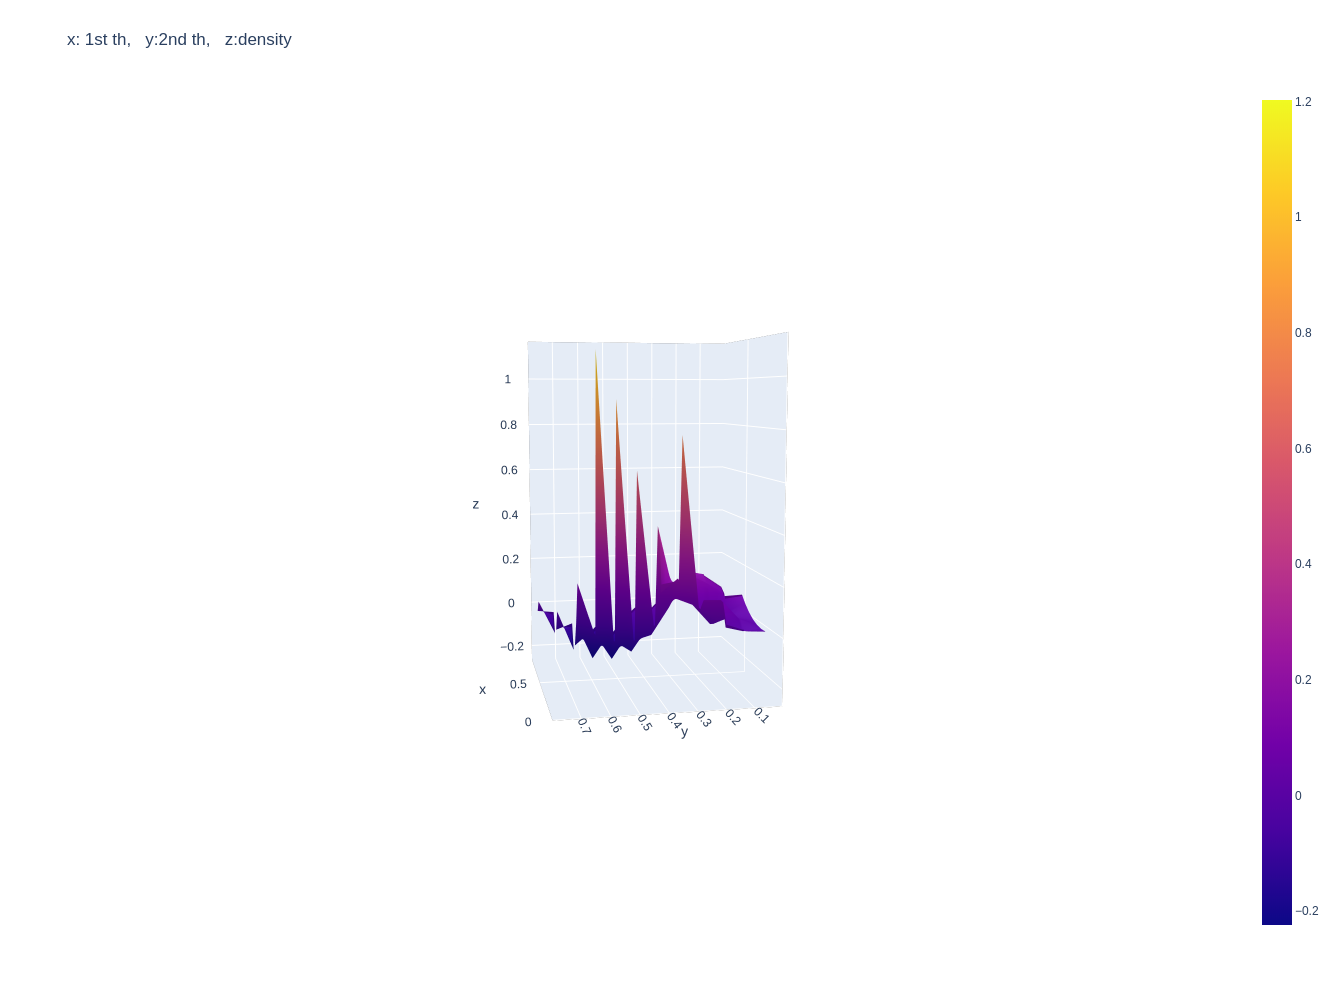

In [136]:
import scipy 
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# 2D-arrays from DataFrame
x1 = np.linspace(dfd['initial_t'].min(), dfd['initial_t'].max(), len(dfd['initial_t'].unique()))
y1 = np.linspace(dfd['merging_t'].min(), dfd['merging_t'].max(), len(dfd['merging_t'].unique()))

"""
x, y via meshgrid for vectorized evaluation of
2 scalar/vector fields over 2-D grids, given
one-dimensional coordinate arrays x1, x2,..., xn.
"""

x2, y2 = np.meshgrid(x1, y1)

# Interpolate unstructured D-dimensional data.
z2 = scipy.interpolate.griddata((dfd['initial_t'], dfd['merging_t']), dfd['density'], (x2, y2), method='cubic')

# Ready to plot
fig = go.Figure(data=[go.Surface(z=z2, x=x2, y=y2)])

fig.update_layout(title='x: 1st th,   y:2nd th,   z:density', autosize=False,
                  width=1000, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

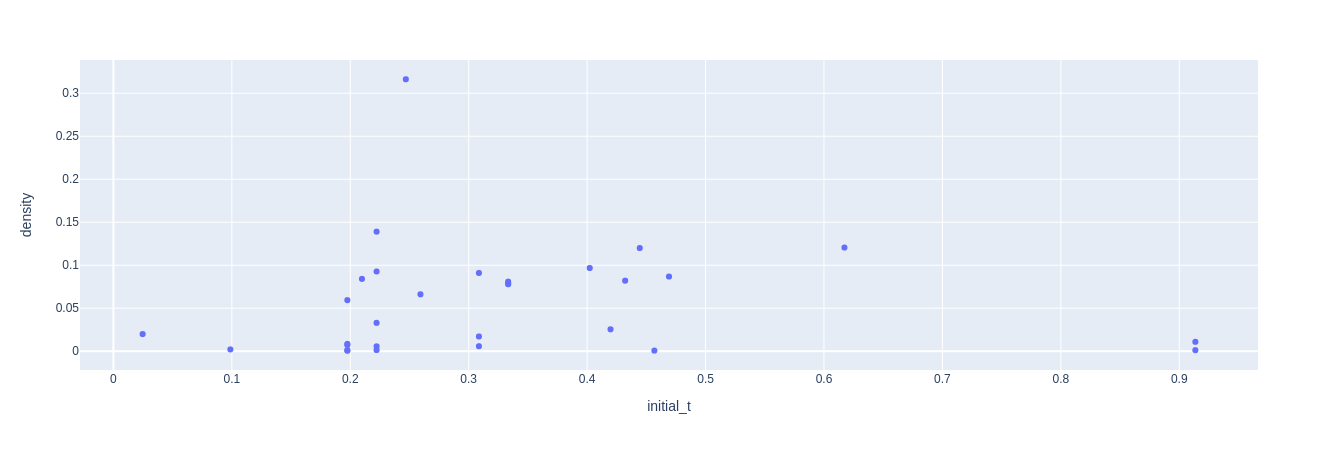

In [133]:
import plotly.express as px
fig = px.scatter(dfd, x='initial_t', y='density')
fig.show()

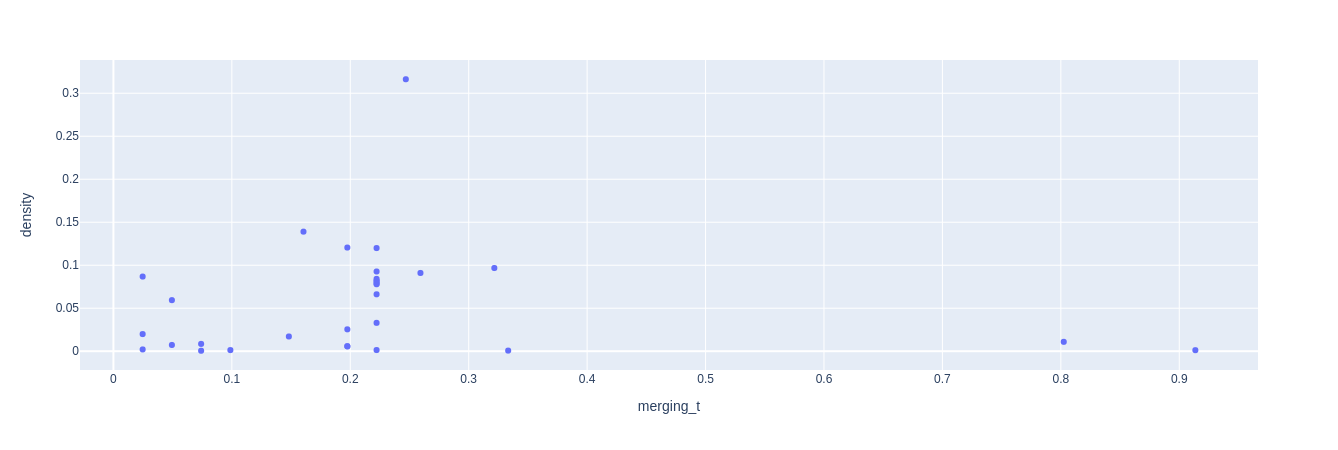

In [134]:
import plotly.express as px
fig = px.scatter(dfd, x='merging_t', y='density')
fig.show()

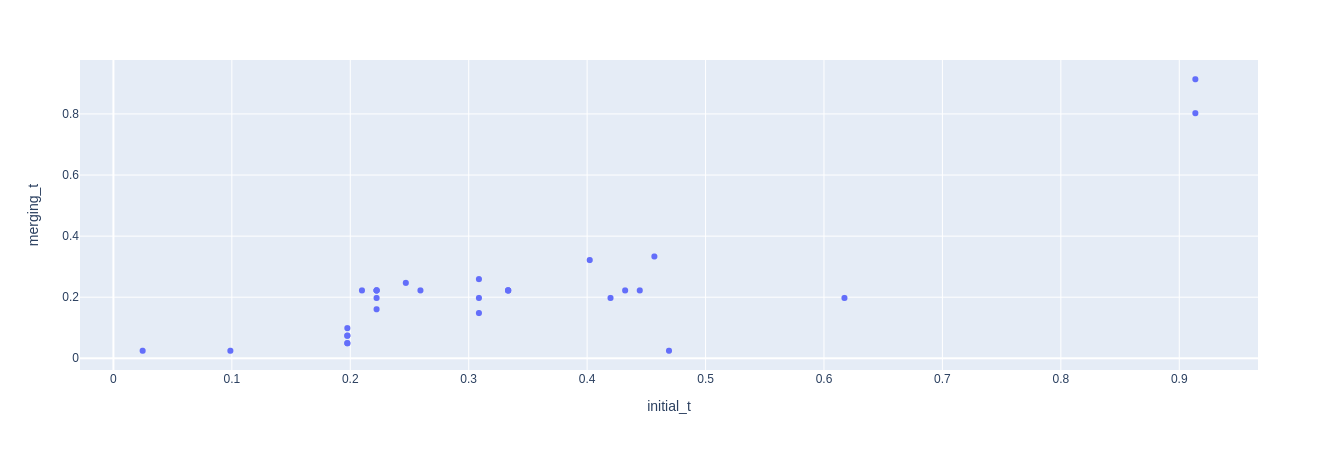

In [135]:
import plotly.express as px
fig = px.scatter(dfd, x='initial_t', y='merging_t')
fig.show()